<a href="https://colab.research.google.com/github/stivenbg/Basics_ML/blob/main/Last_version_code_batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Ici je loads mes data eta issue de simulation
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['eta_401_simulations.xlsx']))
print(df);
eta=df.loc[:,:].to_numpy()
eta = np.insert(eta, 0, 0.075857, axis=0)
eta=Variable(torch.from_numpy(eta).float(), requires_grad=False).to(device)
eta = eta.reshape(401, 30) #On réorganise éta par batch size
eta.shape


Saving eta_401_simulations.xlsx to eta_401_simulations (5).xlsx
       0.075857
0      0.007478
1      0.008593
2      0.007291
3     -0.002083
4      0.029796
...         ...
12024  0.062115
12025  0.016604
12026 -0.007365
12027 -0.021277
12028 -0.103011

[12029 rows x 1 columns]


torch.Size([401, 30])

In [ ]:
#Ici je loads mes data matrice de contrainte
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['B_30_5_ok.xlsx']))
print(df);
B=df.loc[:,:].to_numpy() #Operateur projection defini par representants de riezs et modes propres
B=Variable(torch.from_numpy(B).float(), requires_grad=False).to(device)  

Saving B_30_5_ok.xlsx to B_30_5_ok (2).xlsx
    Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4
0    -0.110060    1.020169    0.311766    0.014873   -0.024188
1    -0.372461    1.044086    0.036917   -0.159778    0.041253
2     0.298699    1.019386    0.039257    0.129416   -0.008978
3    -0.507648    1.058045    0.152694    0.106740   -0.059194
4    -0.249714    1.043524   -0.127728   -0.153658   -0.084113
5     0.342856    1.010514   -0.152502   -0.173049   -0.017911
6     0.446141    0.974297    0.308551   -0.140721   -0.139692
7    -0.178723    1.055231   -0.042378    0.109208    0.102030
8    -0.403799    1.040744    0.234490    0.022484   -0.094341
9     0.114555    1.015554    0.043995   -0.140372    0.033644
10    0.004232    1.033354    0.036413    0.050552    0.017288
11   -0.465335    1.057225    0.024900   -0.056785    0.064558
12    0.490161    0.994504    0.168576   -0.004098    0.055137
13   -0.298811    1.061329   -0.226609    0.003781   -0.098267
14   -0.089

In [ ]:
mu=torch.arange(2, 10.02, 0.02).reshape(-1, 1) # mu va de 1 à 12 paer pas de 0.05

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10,10)
        self.fc3 = nn.Linear(10, 30)


    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        x = self.tanh(x)
        return x


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
5000 Traning Loss: tensor(0.0368)
5001 Traning Loss: tensor(0.0368)
5002 Traning Loss: tensor(0.0368)
5003 Traning Loss: tensor(0.0368)
5004 Traning Loss: tensor(0.0368)
5005 Traning Loss: tensor(0.0368)
5006 Traning Loss: tensor(0.0368)
5007 Traning Loss: tensor(0.0368)
5008 Traning Loss: tensor(0.0368)
5009 Traning Loss: tensor(0.0368)
5010 Traning Loss: tensor(0.0368)
5011 Traning Loss: tensor(0.0368)
5012 Traning Loss: tensor(0.0368)
5013 Traning Loss: tensor(0.0368)
5014 Traning Loss: tensor(0.0368)
5015 Traning Loss: tensor(0.0368)
5016 Traning Loss: tensor(0.0368)
5017 Traning Loss: tensor(0.0367)
5018 Traning Loss: tensor(0.0367)
5019 Traning Loss: tensor(0.0367)
5020 Traning Loss: tensor(0.0367)
5021 Traning Loss: tensor(0.0367)
5022 Traning Loss: tensor(0.0367)
5023 Traning Loss: tensor(0.0367)
5024 Traning Loss: tensor(0.0367)
5025 Traning Loss: tensor(0.0367)
5026 Traning Loss: tensor(0.0367)
5027

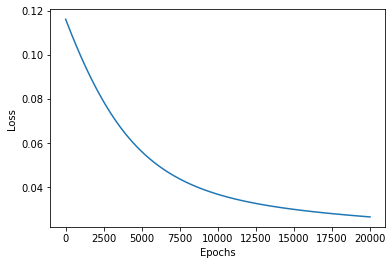

In [ ]:
loss_values = []
grad_values = []
loss=2000


model = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0005)


for epoch in range(10000):
    outputs = model(mu)
    loss = criterion(outputs, eta)
    loss_values.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    grad_sum=0

    for param in model.parameters():
      grad_sum +=param.grad.norm()
    grad_values.append(grad_sum.item())
    optimizer.step()

    with torch.autograd.no_grad():
          # Append the current loss value to the loss_values list
      loss_values.append(loss.data)
      print(epoch,"Traning Loss:",loss.data)


    #if (epoch+1) % 10 == 0:
     #   print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

plt.plot(loss_values)
plt.xlabel("Epochs")
plt.ylabel("Loss")

#plt.plot(grad_values)
#plt.xlabel("Epochs")
#plt.ylabel("Gradients")

plt.show()

In [ ]:
eta66=model(torch.ones(1,1) * 6.66)
print(eta66)

tensor([[-0.1135,  0.0201,  0.0348, -0.0004, -0.0200, -0.1064,  0.0974,  0.0363,
         -0.2246,  0.2128, -0.0124, -0.0060,  0.1370, -0.0149, -0.0346, -0.1016,
         -0.1165, -0.0784, -0.0353, -0.0965,  0.1081, -0.1024,  0.0937,  0.1700,
         -0.0590,  0.1662, -0.1450,  0.1046, -0.1680,  0.1018]],
       grad_fn=<TanhBackward0>)


In [ ]:
 model(torch.ones(1,1) * 6.66)@ B

tensor([[ 0.1472, -0.1720,  0.0300, -0.1068,  0.0830]], grad_fn=<MmBackward0>)

In [ ]:
model = Net()


In [ ]:
print(eta)

tensor([[-0.0135,  0.0086,  0.0015,  ..., -0.0110,  0.0027,  0.0128],
        [ 0.0049, -0.0050, -0.0173,  ..., -0.0055, -0.0067,  0.0024],
        [-0.0001,  0.0190,  0.0218,  ...,  0.0068,  0.0013,  0.0042],
        ...,
        [ 0.0729,  0.0256, -0.0772,  ...,  0.0140,  0.0638,  0.0152],
        [-0.0292, -0.0009, -0.0025,  ...,  0.0282, -0.0701,  0.0235],
        [ 0.0533,  0.0456, -0.0013,  ...,  0.0258,  0.0545,  0.0304]])


In [ ]:
#import torch  
#import torch.nn as nn  


class ProjectionActivation(torch.autograd.Function):  
    @staticmethod  
    def forward(ctx, input, constraint_matrix):  
        # Compute the projection of the input onto the feasible region  
        projection = input - constraint_matrix @ (constraint_matrix.t() @ input)  
        # Ensure that the projection satisfies the constraint  
        #projection -= constraint_matrix @ (constraint_matrix @ projection)  
        ctx.save_for_backward(input, constraint_matrix)  
        return projection  
    @staticmethod  
    def backward(ctx, grad_output):  
        input, constraint_matrix = ctx.saved_tensors  
        # Compute the gradient of the projection with respect to the input  
        grad_input = grad_output - constraint_matrix @ (constraint_matrix.t() @ grad_output)  
        return grad_input, None 

        
         
class ConstrainedNetwork(nn.Module):  
    def __init__(self, constraint_matrix):  
        super(ConstrainedNetwork, self).__init__()  
        self.fc1 = nn.Linear(1, 5)  
        self.fc2 = nn.Linear(5, 25)

        # self.fc1 = nn.Linear(1, 25)
        # self.fc2 = nn.Linear(25, 5)  
        # self.fc3 = nn.Linear(5, 5)
        # self.fc4 = nn.Linear(5, 5)   
        # self.fc5 = nn.Linear(5, 1)   
        self.constraint_matrix = constraint_matrix  


    def forward(self, x):  
        x = self.fc1(x)  
        x = ProjectionActivation.apply(x, self.constraint_matrix)  
        x = self.fc2(x)
        x = torch.tanh(x)
      #  # x = ProjectionActivation.apply(x, self.constraint_matrix)  
      #   x = self.fc3(x)
      #   #x = ProjectionActivation.apply(x, self.constraint_matrix)  
      #   x = self.fc4(x)
      #   #x = ProjectionActivation.apply(x, self.constraint_matrix)  
      #   x = self.fc5(x)  
  
        return x  
# Create the constraint matrix  
#constraint_matrix = torch.randn(25, 5)
constraint_matrix = B 


# Create the network  
model = ConstrainedNetwork(constraint_matrix)  
# Generate a random input  
input = torch.randn(25,1)  
# Compute the output of the network  
output = model(input)  
# Check that the output satisfies the constraint  
constraint_violation = constraint_matrix.t() @ output  # la dimension est bonne ici
print(constraint_violation)  # Should be close to zero